# Identifying the games factors to measure the success

We are working for the online store Ice, which sells video games all over the world. We would like to identify the patterns to measure the success of selling. From there, we could find the game which has a big potential to get a plan of advertising appropriately. First, we have to learn the general information from the data such as finding the missing values and the type of the data. Then, analyzing data, we are going to find the most popular games until 2016. After that, we filter the data from 2013 until 2016 because the data will lead us to get the most potential game in 2017. We want to know in NA (North America), EU (Europe) and JP (Japan), what games has a big potential to sell there, then we would like to test the hypothesis to answer "Is Xbox One users and PC users have the same rating average? Is action genre and sports have the different rating average?"


# Table of Contents

1. General Information
2. Data Preprocessing
3. Analysis
4. Users profile
5. Hypothesis Testing
6. Conclusion

## General Information

Import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
games.shape

(16715, 11)

In [5]:
#Check the info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#check the missing values
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#check the duplicates
games.duplicated().sum()

0

In [8]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


From the information above, we can conclude that there are missing values in 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'Rating'. The name of the columns need to lowercase to make it easier for processing. The data doesn't have duplicates.

## Data Preprocessing

#### Change the columns name to lowercase _(Ganti nama kolom (pakai huruf kecil semua)._

In [9]:
games.columns = games.columns.str.lower()

In [10]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Handling the missing values and TBD _(Mengatasi Nilai Hilang dan TBD)_

Firstly, we choose the column 'name' and eliminating the missing values.

In [11]:
games_clean = games[(games['name'].notnull())].reset_index(drop=True)

In [12]:
games_clean.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [13]:
games_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games_clean['year_of_release'] = games_clean['year_of_release'].fillna('0')

In [15]:
games_clean.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [16]:
games_clean['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
0.7       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

From the column 'user_score', there a value of TBD (To Be Determined) which is will be changed to 0.

In [17]:
games_clean['user_score'] = games_clean['user_score'].replace('tbd',np.nan)
games_clean['user_score'] = games_clean['user_score'].fillna('0')
games_clean['critic_score'] = games_clean['critic_score'].fillna('0')
games_clean['rating'] = games_clean['rating'].fillna('0')

#### Convert the data types if necessary _(Konversikan data ke tipe data yang dibutuhkan)_.

In [18]:
games_clean['year_of_release'] = games_clean['year_of_release'].astype('int')
games_clean['critic_score'] = games_clean['critic_score'].astype('float')
games_clean['user_score'] = games_clean['user_score'].astype('float')

In [19]:
#check the data types
games_clean.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [20]:
games_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,0
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,0


#### Counting the total selling all regions _(Menghitung total penjualan (jumlah penjualan di semua wilayah) untuk tiap game)_.

In [21]:
games_clean['total_sales'] = games_clean[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [22]:
games_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,0,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,0,0.01


Based on the preprocessing above, we can conclude that we take the column 'name' yang ada isinya, then in the column 'user_score' there is a value TBD which is need to be changed to 0. Then we convert the data type of column 'year_of_release' to be integer, 'critic_score' to be float, 'user_score' to be float. After that we count the total selling.


## Analysis

#### Checking the amount of games released on the different year _(Lihat berapa banyak game yang dirilis pada tahun yang berbeda. Apakah data di setiap periode signifikan?)_

In [23]:
games_year = games_clean.groupby(['year_of_release'])['name'].count().reset_index().astype('int')
games_year

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


<AxesSubplot:xlabel='year_of_release', ylabel='name'>

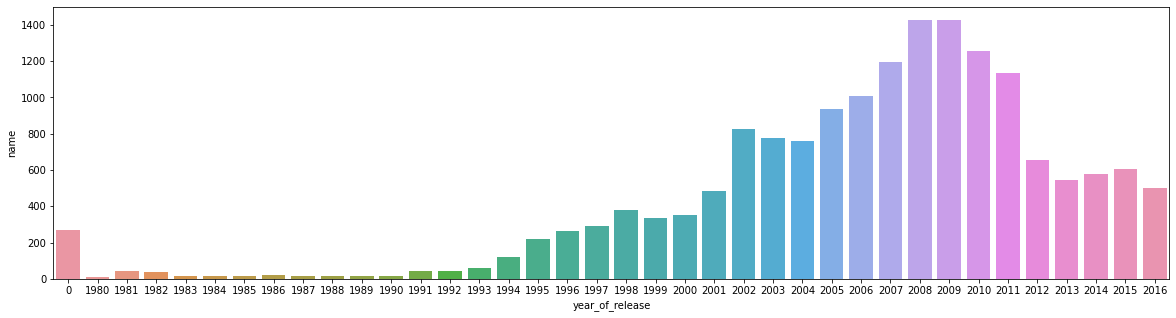

In [24]:
#Making histogram
plt.figure(figsize=(20,5))
sns.barplot(data=games_year, x='year_of_release', y='name')

Based on the histogram above, we found that 2007, 2008, 2009, 2010, and 2011 are the year of highest selling games (golden demand).

#### How the selling be varied for each platform? Find the platform with highest selling and show the distribution on it. _( Lihat bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Pilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun. Cari platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan apa pun. Berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?)_

In [25]:
games_sales = games_clean.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()
games_sales   

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

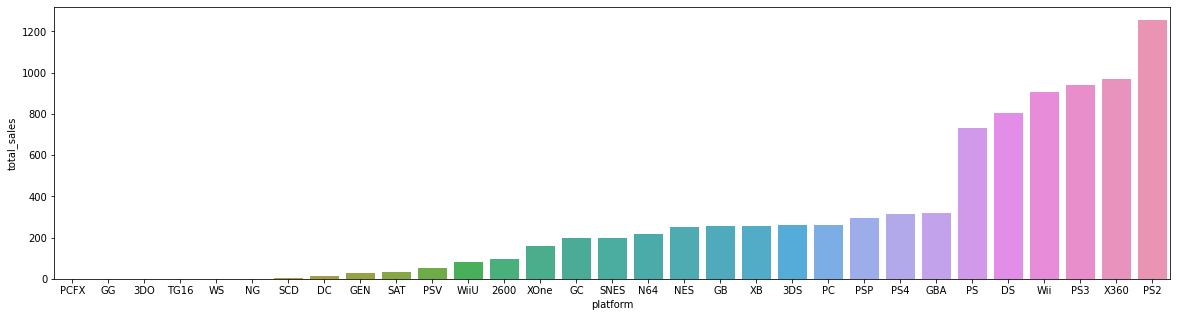

In [26]:
#Making histogram
plt.figure(figsize=(20,5))
sns.barplot(data=games_sales, x='platform', y='total_sales')

In [27]:
games_clean_pivot = games_clean[games_clean['year_of_release']!=0].reset_index(drop=True)

Now, we would like to know the distribution of the games.

In [28]:
games_distribution = pd.pivot_table(games_clean_pivot, index = 'year_of_release', columns = 'platform', 
               values = 'total_sales', aggfunc='sum').fillna('0').astype('int')

In [29]:
games_distribution

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'PS2 Distribution')

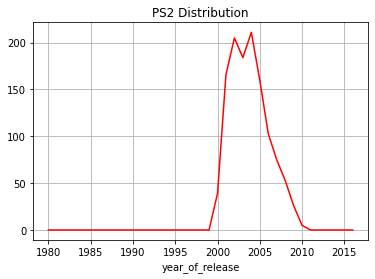

In [30]:
games_distribution['PS2'].plot(color='red', grid = True)
plt.title('PS2 Distribution')

From the plot above, PS2 has highest selling across year 2000 and decreased on 2010.

<AxesSubplot:xlabel='year_of_release'>

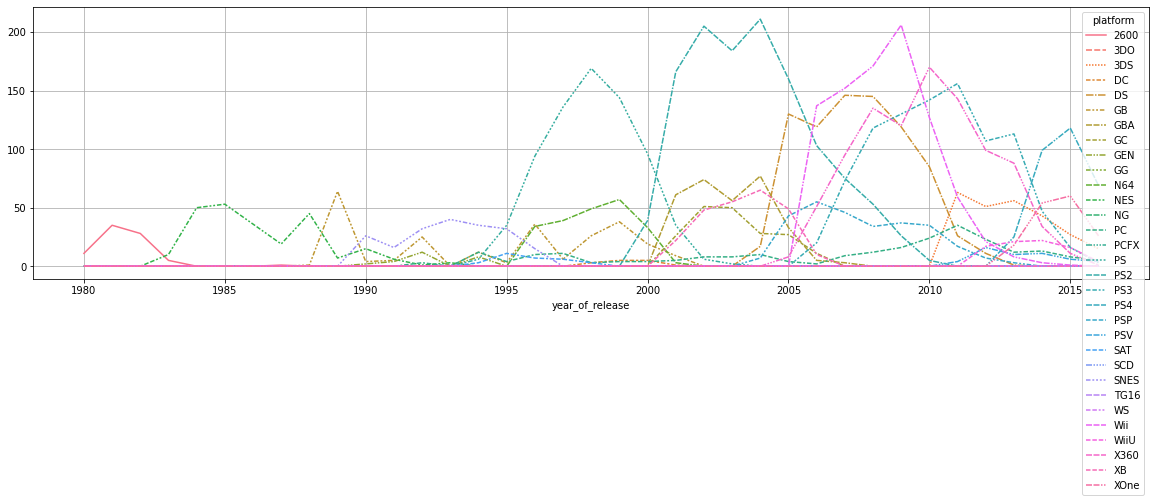

In [31]:
plt.figure(figsize=(20,5))
plt.grid(True)
sns.lineplot(data=games_distribution)



From the graph above, we could conclude that PS2 has a good selling, then decreased to zero on 2010 though. The platform can survive around 10 years on average.

#### Finding the period of collecting data to build a model for 2017 _(Tentukan periode waktu pengambilan data. Untuk melakukannya, lihat jawabanmu di pertanyaan sebelumnya. Data yang kamu ambil seharusnya memungkinkan kamu untuk membangun model bagi tahun 2017)_.

In [32]:
new_df = games_clean.query('year_of_release > 2012')

In [33]:
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


conclution: We take a data from 2013 until 2016 due to that year has could be role model of potential game to sell in 2017.

#### What platform has a highest selling? What platform has been grown? Pick a platform has good potential to earn profit _(Platform mana saja yang memiliki penjualan terbanyak? Platform mana saja yang tumbuh atau menyusut? Pilih beberapa platform yang berpotensi menghasilkan keuntungan.)_


In [34]:
new_df_total_sales = new_df.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()

In [35]:
new_df_total_sales

,platform,total_sales
0,DS,1.54
1,PSP,3.50
2,Wii,13.66
3,PSV,32.99
4,PC,39.43
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43


From the table above we get PS4 has highest sales. Now, we create a barplot to see the comparation.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

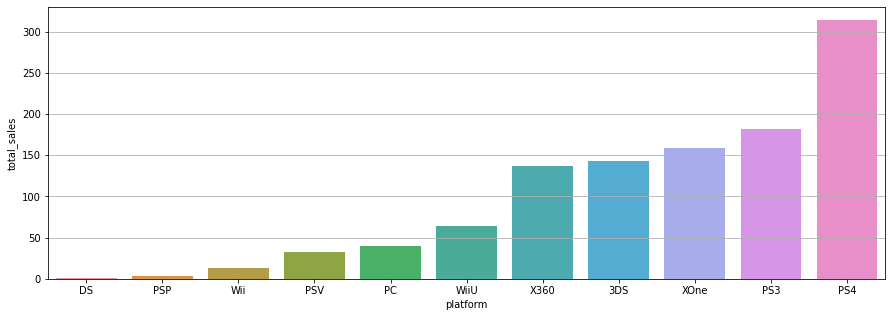

In [36]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.barplot(data=new_df_total_sales, x='platform', y='total_sales')

Based on the diagram above we could conclude that duirng 4 years (2013 to 2016), PS4 becomes the highest sales platform. Otherwise, initially PS2 has been the highest sales changed to decreasing sales. So, PS4 has a good potential sales in 2017.


#### Create a boxplot for global game sales depending platform. Are they have significant difference? How's the average sales? _(Buat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform. Apakah perbedaan penjualannya signifikan? Bagaimana dengan penjualan rata-rata pada berbagai platform?)_


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

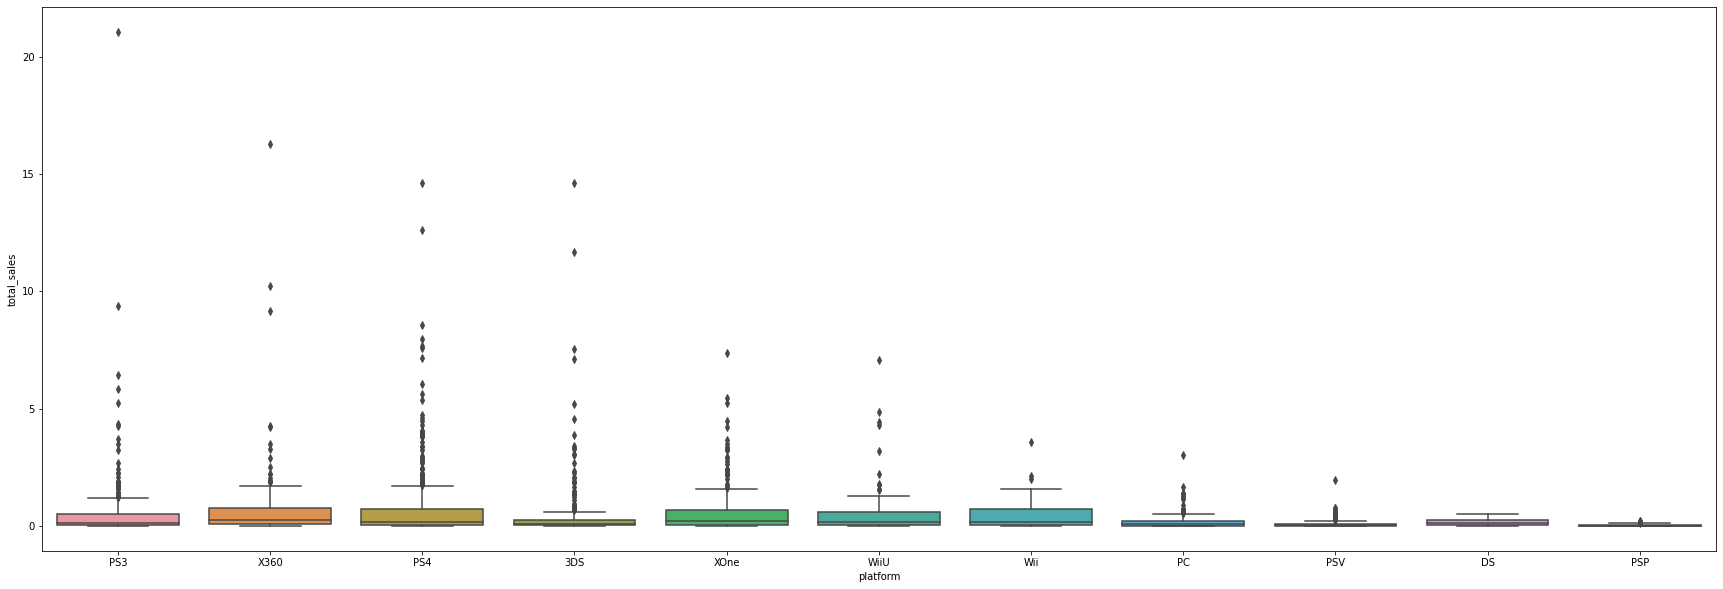

In [37]:
plt.figure(figsize=(30,10))
sns.boxplot(data=new_df, x='platform', y='total_sales')

In [38]:
new_df.groupby(['platform'])['total_sales'].mean().sort_values().reset_index()

,platform,total_sales
0,PSP,0.052239
1,PSV,0.092151
2,DS,0.192500
3,PC,0.208624
4,3DS,0.472772
5,PS3,0.525884
6,WiiU,0.562000
7,Wii,0.593913
8,XOne,0.645020
9,X360,0.735484


The average of highest sales platform is PS4 followed by X360. we could see from the boxplot, there are something interesting which is PS3 has a higher sales, but has no really high on average sales.


#### Analyze how the review of user and profesional influences the sales. Make a scatter plot and count the correlation between review and sales. _(Lihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer (yang kamu pilih). Buat sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan)_.


In [39]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [40]:
df_PS4 = new_df.query('platform=="PS4"')
df_PS4 = df_PS4.groupby(['name','platform'])['total_sales','critic_score','user_score'].sum().query(
    'critic_score > 0 & user_score > 0').reset_index()

In [41]:
df_PS4

,name,platform,total_sales,critic_score,user_score
0,7 Days to Die,PS4,0.14,45.0,5.9
1,Aegis of Earth: Protonovus Assault,PS4,0.02,57.0,7.8
2,Agatha Christie's The ABC Murders,PS4,0.02,67.0,6.2
3,Alien: Isolation,PS4,1.12,79.0,8.1
4,Angry Birds Star Wars,PS4,0.22,47.0,2.0
...,...,...,...,...,...
244,World of Final Fantasy,PS4,0.34,77.0,8.3
245,Worms: WMD,PS4,0.03,78.0,7.6
246,XCOM 2,PS4,0.14,88.0,8.0
247,Zombie Army Trilogy,PS4,0.20,62.0,6.8


In [42]:
df_PS4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

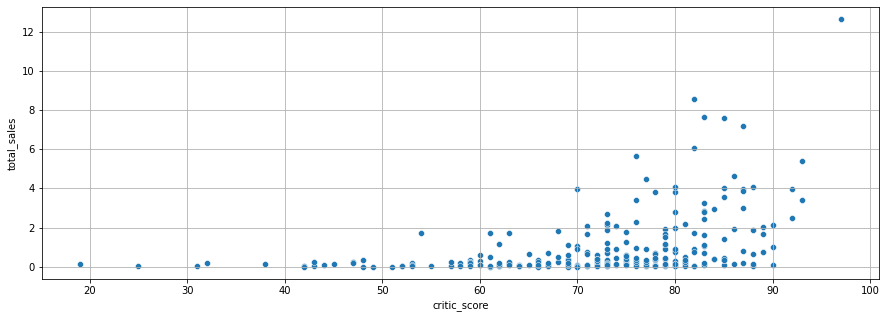

In [43]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.scatterplot(data=df_PS4, x='critic_score', y='total_sales')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

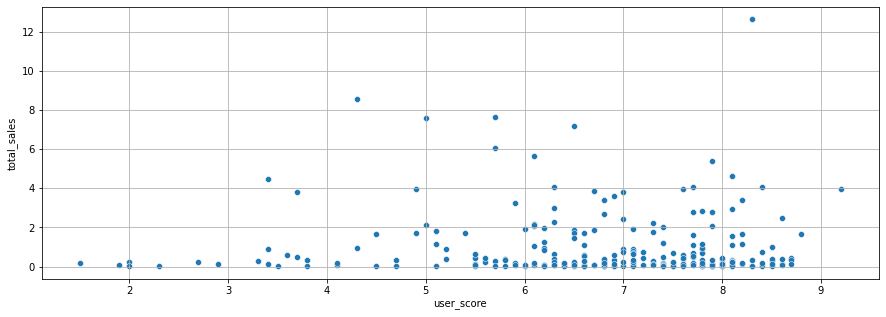

In [44]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.scatterplot(data=df_PS4, x='user_score', y='total_sales')

From the diagram above, the review from profesional influences the sales. We can see from the correlation tabel between total_sales and critic_score has value 0.4. Otherwise, user_score not really influences the sales because it just have the value -0.03.


#### Compare the game sales in other platform _(Dengan mengingat kesimpulanmu, bandingkan penjualan game yang sama di platform lain.)_


In [45]:
df_XOne = new_df.query('platform=="XOne"')
df_XOne = df_XOne.groupby(['name','platform'])['total_sales','critic_score','user_score'].sum().query(
    'critic_score > 0 & user_score > 0').reset_index()

In [46]:
df_XOne

,name,platform,total_sales,critic_score,user_score
0,7 Days to Die,XOne,0.05,35.0,5.2
1,Agatha Christie's The ABC Murders,XOne,0.01,66.0,7.5
2,Alien: Isolation,XOne,0.50,78.0,7.8
3,Angry Birds Star Wars,XOne,0.17,53.0,6.9
4,Assassin's Creed Syndicate,XOne,1.29,78.0,6.1
...,...,...,...,...,...
160,Wolfenstein: The Old Blood,XOne,0.15,75.0,8.0
161,Worms: WMD,XOne,0.01,75.0,8.1
162,XCOM 2,XOne,0.04,87.0,8.1
163,Zombie Army Trilogy,XOne,0.11,62.0,7.2


In [47]:
df_XOne.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

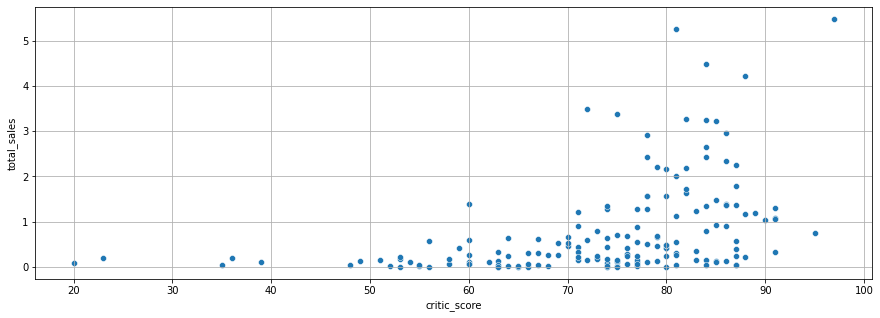

In [48]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.scatterplot(x='critic_score', y='total_sales', data = df_XOne )

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

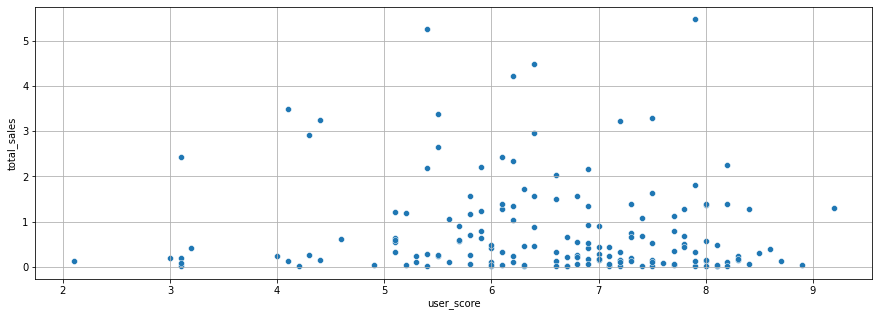

In [49]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.scatterplot(x='user_score', y='total_sales', data = df_XOne )

From the diagram above, for platform XOne, the review from the profesional influences the sales also. We can see from the correlation table between total_sales and critic_score which has value 0.4. Otherwise, user_score not really influences the sales, it just have value -0.09.


####  Analyze the distribution of game depends on genre. What genre has potential profit? Generate the genre with high and low sales. _(Amati distribusi umum game berdasarkan genre. Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Bisakah kamu melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?)_

In [50]:
new_df['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [51]:
games_top_genre = new_df.groupby(['genre'])['total_sales'].sum().sort_values(ascending = False).reset_index()

In [52]:
games_top_genre

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


<AxesSubplot:xlabel='genre', ylabel='total_sales'>

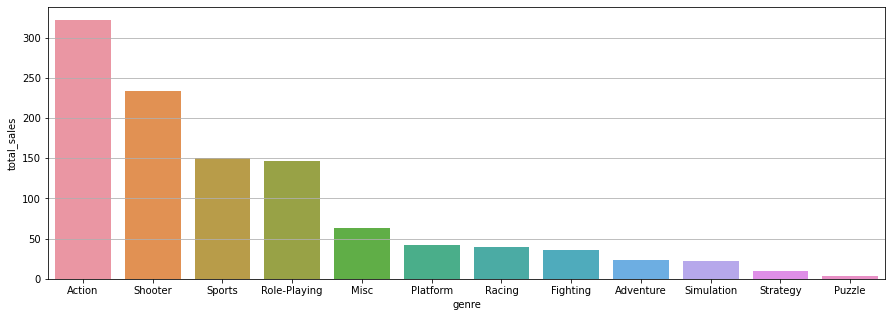

In [53]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.barplot(x='genre', y='total_sales', data = games_top_genre )

Based on the diagram above, action genre will be the profitable genre followed by shooter genre. The low potential profit genre are adventure, simulation, strategy, and puzzle.


## Profil User

For region (NA, EU, JP), find: 5 top platforms. Explain the market on each region. Does the rating influence the sales for each region?


### 5 Top Platforms

In [54]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [55]:
games_platform = new_df.groupby(['platform'])['na_sales','eu_sales','jp_sales'].sum().sort_values(by='platform')
games_platform2 = new_df.groupby(['platform'])['na_sales','eu_sales','jp_sales'].sum().sort_values(by='platform').reset_index()

In [56]:
games_platform

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
DS,0.57,0.85,0.00
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSP,0.00,0.17,3.29
PSV,5.04,6.10,18.59
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88


<AxesSubplot:xlabel='platform'>

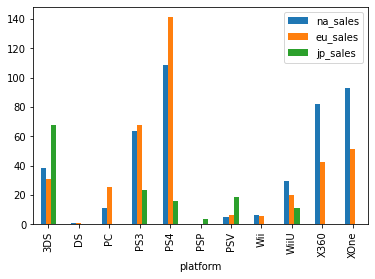

In [57]:
games_platform.plot(kind='bar')

Text(0.5, 1.0, 'NA_SALES')

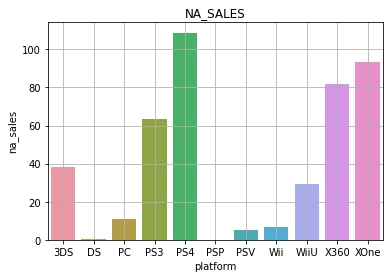

In [58]:
sns.barplot(x='platform', y='na_sales', data=games_platform2)
plt.grid(True)
plt.title('NA_SALES')

Text(0.5, 1.0, 'EU_SALES')

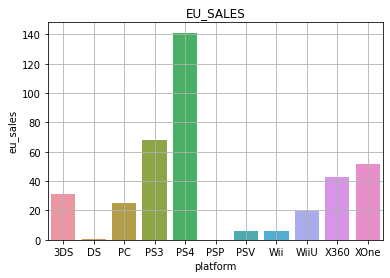

In [59]:
sns.barplot(x='platform', y='eu_sales', data=games_platform2)
plt.grid(True)
plt.title('EU_SALES')

Text(0.5, 1.0, 'JP_SALES')

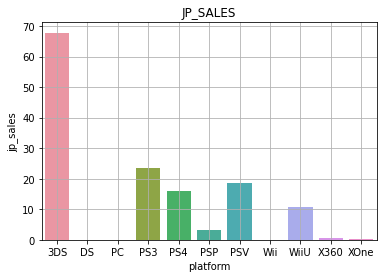

In [60]:
sns.barplot(x='platform', y='jp_sales', data=games_platform2)
plt.grid(True)
plt.title('JP_SALES')

Based on the top platforms for region North America and Europe is PS4. For region Japan, the top platform is 3DS.


### 5 Top Genre

In [61]:
games_genre = new_df.groupby(['genre'])['na_sales','eu_sales','jp_sales'].sum().sort_values(by='genre')
games_genre2 = new_df.groupby(['genre'])['na_sales','eu_sales','jp_sales'].sum().sort_values(by='genre').reset_index()

In [62]:
games_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Adventure,7.14,8.25,5.82
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Puzzle,0.83,1.00,1.18
Racing,12.96,20.19,2.30
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61


In [63]:
games_genre2

,genre,na_sales,eu_sales,jp_sales
0,Action,126.05,118.13,40.49
1,Adventure,7.14,8.25,5.82
2,Fighting,15.55,8.55,7.65
3,Misc,27.49,20.04,9.20
4,Platform,18.14,15.58,4.79
5,Puzzle,0.83,1.00,1.18
6,Racing,12.96,20.19,2.30
7,Role-Playing,46.40,36.97,51.04
8,Shooter,109.74,87.86,6.61
9,Simulation,4.86,10.92,4.52


<AxesSubplot:xlabel='genre'>

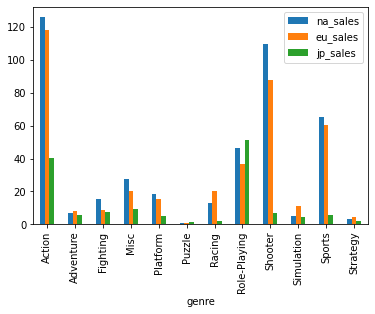

In [64]:
games_genre.plot(kind='bar')

Text(0.5, 1.0, 'NA_SALES')

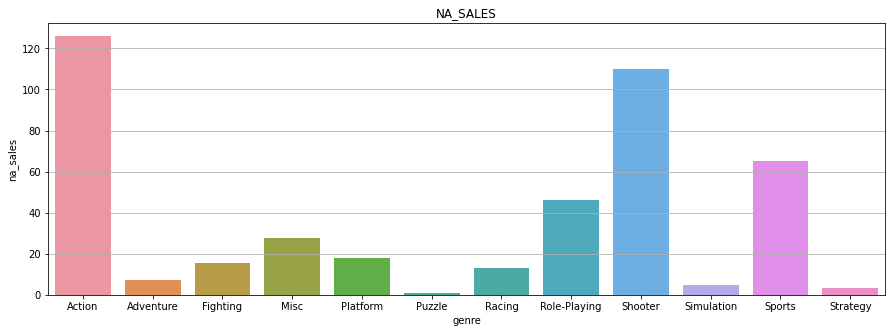

In [65]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.barplot(x='genre', y='na_sales', data=games_genre2)
plt.title('NA_SALES')


Text(0.5, 1.0, 'EU_SALES')

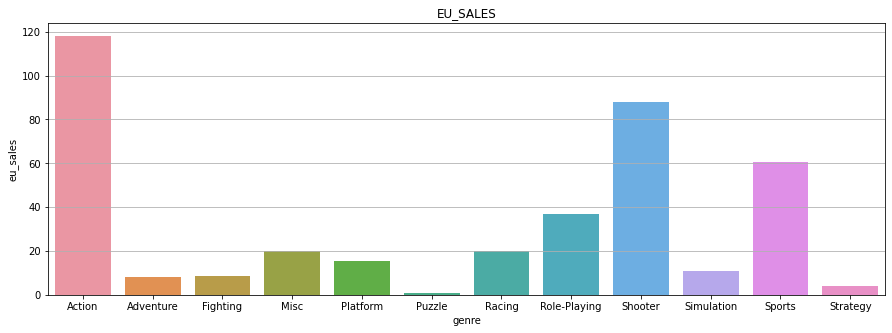

In [66]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.barplot(x='genre', y='eu_sales', data=games_genre2)
plt.title('EU_SALES')


Text(0.5, 1.0, 'JP_SALES')

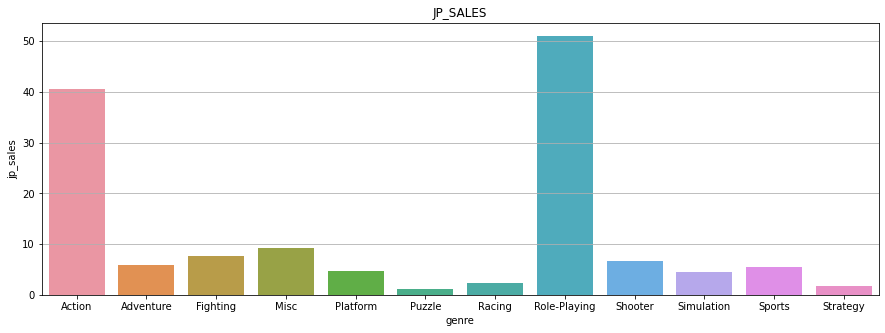

In [67]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.barplot(x='genre', y='jp_sales', data=games_genre2)
plt.title('JP_SALES')


Based on the top genre fro region North America and Europe is action. Otherwise, for region Japan, the top genre is Role-Playing.

## Uji Hipotesis


#### The average of Xbox One and PC users are same. _(Rata-rata rating pengguna platform Xbox One dan PC adalah sama.)_
Ho = The average user rating of platform Xbox One and PC is SAME.

H1 = The average user rating of platform Xbox One and PC is NOT SAME.

In [68]:
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


In [69]:
new_df_notnull_user = new_df.query('user_score > 0')

In [70]:
new_df_notnull_user

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16641,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0.0,6.6,E,0.01
16650,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16652,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,0.0,5.1,E10+,0.01
16658,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,0,0.01


In [71]:
new_df_XOne = new_df_notnull_user[new_df_notnull_user['platform']=='XOne']
new_df_PC = new_df_notnull_user[new_df_notnull_user['platform']=='PC']

In [72]:
np.var(new_df_XOne['user_score']), np.var(new_df_PC['user_score'])

(1.8965188383045526, 3.016306347554631)

In [73]:
alpha = 0.05
results = st.ttest_ind(new_df_XOne['user_score'], new_df_PC['user_score'], equal_var=False)
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('We reject Ho')
else:
    print('We can not reject Ho')

p-value: 0.14759594013430463
We can not reject Ho


According the hypothesis testing above, we can conclude that 'The average user rating of platform Xbox One and PC is SAME'.

#### The average of action and sport genre are different _(Rata-rata rating pengguna genre Action dan Sports berbeda)._

Ho = The average user rating of action and sports genre is SAME.

H1 = Ho = The average user rating of action and sports genre is NOT SAME.

In [74]:
new_df_action = new_df[new_df['genre']=='Action']
new_df_sports = new_df[new_df['genre']=='Sports']

In [75]:
alpha = 0.05
results = st.ttest_ind(new_df_action['user_score'], new_df_sports['user_score'], equal_var=False)
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('We reject Ho')
else:
    print('We can not reject Ho')

p-value: 0.051807560603891564
We can not reject Ho


According the hypothesis testing above, we can conclude that 'The average user rating of action and sports genre is SAME'.


# 6 CONCLUSION

Based on the analysis and hypothesis testing that has been carried out above, it is concluded that:
1. The data provided contains missing values in the 'name', 'year_of_release', 'critic_score', 'user_score', 'rating' columns, so this needs to be handled. For the 'name' column, elimination was carried out because there were only 2 values missing, while the other columns were filled with 0 using fillna.
2. There are data types that need to be converted, such as the 'year_of_release' column which is converted to an integer data type.
3. The highest sales of games occurred from 2007 to 2011.
3. After carrying out processing, it was found that the PS2 had been a popular platform until 2010 and then began to lose its popularity.
4. The platform that has large sales potential in 2017 is PS4, followed by PS3.
5. The genre that has the potential to generate large sales is Action and followed by Shooter.
6. In the last 4 years, the most sales in North America were the PS4 and XOne platforms with the Action and Shooter genres.
7. In the last 4 years, the most sales in Europe have been the PS4 and PS3 platforms with the Action and Shooter genres.
8. In the last 4 years, the most sales in the Japanese region were the 3DS and PS3 platforms with the Role-Playing and Action genres.
9. Based on hypothesis testing, it was found that the average user rating for the Xbox One and PC platforms is the same.
10. The second hypothesis test showed that the average user rating for the Action and Sports genres was the same.